In [7]:
# autor: Kamil Tasarz

In [8]:
setprecision(256) # ustawienie precyzji obliczeń na 256 bitów

256

In [9]:
γ = BigFloat("0.5772156649015328606065120900824024310421593359399235988057672348848677267776646709369470632917467495146314472498070824809605040");
# przybliżenie liczby w precyzji 256-bitowej

γn(n) =  sum(BigFloat(1.0/a) for a in 1.0:1.0:n) - log(n); # definicja liczby γ_n  z treści zadania

In [10]:
start = 1e5
finish = 1e6
step = 1e5

X = [BigFloat("1.0") log(start)] # macierz X zdefiniowana w sprawozdaniu
Y = [log(γn(start) - γ)] # macierz Y zdefiniowana w sprawozdaniu

for i in start+step:step:finish # konstrukcja macierzy X i Y
    @show(i)                      # ta i następna linijka służą tylko do wyświetlania postępu obliczeń
    IJulia.clear_output(true)     # nie wnoszą nic do wyniku
    X = [X; [BigFloat("1.0") log(i)]]
    Y = [Y; [log(γn(i) - γ)]]
end

inv(X'X)*X'*Y # zastosowanie wzoru na macierz B z sprawozdania używając wbudowanych operacji na macierzach

2-element Vector{BigFloat}:
 -0.6931554398967482445453690491389941129155458695773360593450970048245421719575224
 -0.999999403302626910449706969182706799882353034222981664529077197044933413756142

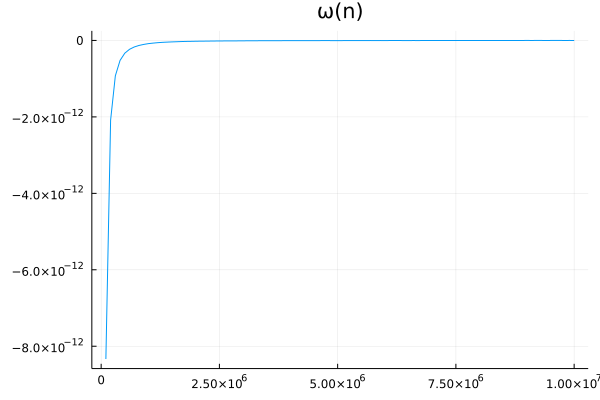

In [11]:
using Plots
# przyjmuję d=1,c=0.5 i chcę sprawdzić czy wyrażenie γ_n - γ - 1/(2n) zbliża się do 0.0

xs = collect(100000:100000:10000000) # wektor n, dla którego będę wyliczał wartości
f(x) = γn(x) - γ - BigFloat("0.5")/x # funckja, której uzyję do wyliczenia wartości
ys = f.(xs) # wartości ω(n)
plot(xs, ys, title = "ω(n)", label = nothing)
# savefig("wyk.png") #zapisanie wykresu do pliku .png